

### Énoncé du problème :

Dans l'industrie des télécommunications, les clients peuvent choisir parmi un ensemble d'entreprises pour répondre à leurs besoins en matière de communication et d'internet. Les clients sont très critiques quant aux services qu'ils reçoivent et jugent l'ensemble de l'entreprise sur une seule expérience ! Ces services de communication sont devenus si récurrents et inséparables de la routine quotidienne qu'une interruption de maintenance de 30 minutes génère de l'anxiété chez les utilisateurs, mettant en évidence notre attitude de prise pour acquise de ces services ! Associée à des coûts d'acquisition client élevés, l'analyse de l'attrition devient donc cruciale ! Le taux d'attrition est une métrique qui décrit le nombre de clients ayant annulé ou non renouvelé leur abonnement avec l'entreprise. Ainsi, plus le taux d'attrition est élevé, plus les clients cessent d'acheter auprès de votre entreprise, affectant directement les revenus ! Grâce aux informations issues de l'analyse de l'attrition, les entreprises peuvent élaborer des stratégies, cibler des segments, améliorer la qualité des services fournis afin d'améliorer l'expérience client, instaurant ainsi un climat de confiance avec les clients. C'est pourquoi la construction de modèles prédictifs et la création de rapports d'analyse de l'attrition deviennent essentielles pour favoriser la croissance !

### Objectif :
- Classifier les clients susceptibles de se désabonner en fonction de variables numériques et catégorielles
- Il s'agit d'un problème de classification binaire avec un jeu de données déséquilibré..

### <center>Attributs du jeu de données</center>
    
- **customerID** : Identifiant du client
- **gender** : Si le client est un homme ou une femme
- **SeniorCitizen** : Si le client est un senior ou non (1, 0)
- **Partner** : Si le client a un partenaire ou non (Yes, No)
- **Dependents** : Si le client a des personnes à charge ou non (Yes, No)
- **tenure** : Nombre de mois pendant lesquels le client est resté avec l'entreprise
- **PhoneService** : Si le client dispose d'un service téléphonique ou non (Yes, No)
- **MultipleLines** : Si le client possède plusieurs lignes ou non (Yes, No, No phone service)
- **InternetService** :  Fournisseur de services Internet du client (DSL, Fiber optic, No)
- **OnlineSecurity** : Si le client dispose d'une sécurité en ligne ou non (Yes, No, No internet service)
- **OnlineBackup** : Si le client dispose d'une sauvegarde en ligne ou non (Yes, No, No internet service)
- **DeviceProtection** : Si le client bénéficie d'une protection d'appareil ou non (Yes, No, No internet service)
- **TechSupport** : Si le client dispose d'une assistance technique ou non (Yes, No, No internet service)
- **StreamingTV** : Si le client a accès à la télévision en streaming ou non (Yes, No, No internet service)
- **StreamingMovies** : Si le client a accès aux films en streaming ou non (Yes, No, No internet service)
- **Contract** : Type de contrat du client (Month-to-month, One year, Two year)
- **PaperlessBilling** : Si le client utilise la facturation électronique ou non (Yes, No)
- **PaymentMethod** : Mode de paiement du client (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : Montant facturé au client mensuellement

- **TotalCharges** : Montant total facturé au client
- **Churn** : Si le client s'est désabonné ou non (Yes, No)


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('/content/sample_data')

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#data.shape
data.info()
#data.describe()
#data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

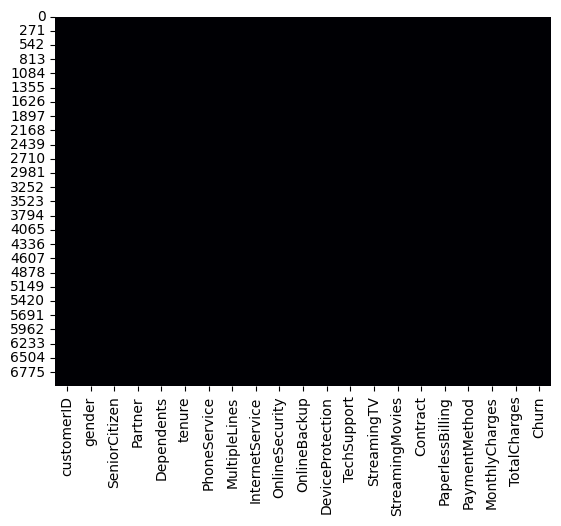

In [5]:
sns.heatmap(data.isnull(),cmap='magma',cbar=False)

In [6]:
l1 = [len(i.split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]

print(l2)

for i in l2:
  data.loc[i,'TotalCharges'] = data.loc[(i-1),'TotalCharges']
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns= ['customerID'], inplace=True)

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


* Lors de la conversion de la colonne TotalCharges en type float, une erreur est survenue indiquant qu'il était impossible de convertir une chaîne en nombre décimal.
* Ce message d'erreur est apparu en raison de la présence de chaînes vides aux positions d'index affichées dans la colonne TotalCharges. Comme ces éléments étaient définis en tant que chaînes de caractères, ils n'étaient pas considérés comme des valeurs nulles, ce qui explique pourquoi la heatmap des valeurs manquantes n'a rien affiché.
Ex : a = ' '
* Pour résoudre ce problème, nous avons séparé chaque élément de TotalCharges et stocké les index des éléments dont la longueur de la chaîne après séparation n'était pas égale à 1.
* Cela a permis de créer une liste contenant les index des chaînes vides, qui ont ensuite été remplacées par leur valeur précédente avant de convertir toute la colonne en float à l'aide de la fonction astype().
* Nous supprimons également la colonne customerID
* Ensuite, nous allons diviser les variables en features numériques et catégorielles.
* Nous appliquerons également une transformation d'encodage des labels pour les variables catégorielles.

In [7]:
from sklearn.preprocessing import LabelEncoder
ls = LabelEncoder()

df1 = data.copy(deep = True)
df1.head(5)


text_data_features = [ i for i in list(data.columns) if i not in list(data.describe().columns)]


print('Label Encoder Transformation')

for i in text_data_features:
  df1[i] = ls.fit_transform(df1[i])
  print(i," : ",df1[i].unique(), ' = ',ls.inverse_transform(df1[i].unique()))

df1.head(5)

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


* Nous créons une copie profonde (deep copy) du jeu de données original et appliquons l’encodage des labels (label encoding) aux données textuelles.
* Les modifications apportées au jeu de données original ne seront pas reflétées dans cette copie profonde.
* Ainsi, nous utiliserons cette copie profonde du jeu de données, dans laquelle toutes les variables ont été converties en valeurs numériques, pour les visualisations et la modélisation.
* Nous allons maintenant afficher les statistiques descriptives des données.

In [8]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2285.169963,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2267.544511,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.675000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1398.250000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3803.050000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


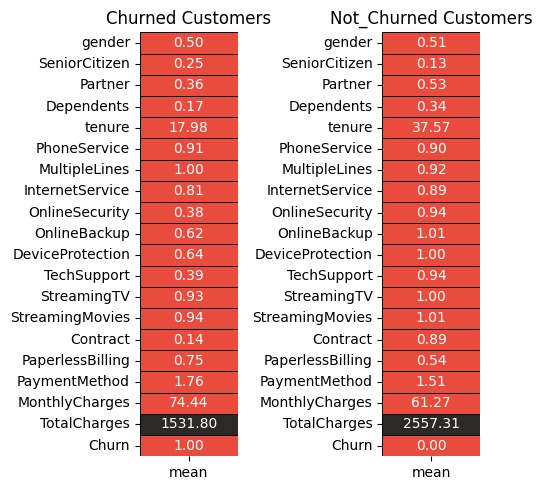

In [9]:
churn  = df1[df1['Churn'] == 1].describe().T
not_churn  = df1[df1['Churn'] == 0].describe().T

colors = ['#E94B3C','#2D2926']

fig,ag = plt.subplots(1,2,figsize=(5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True, cmap= colors, linewidths=0.4, linecolor='black',cbar = False,fmt = '.2f')
plt.title('Churned Customers')
plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True, cmap= colors, linewidths=0.4, linecolor='black',cbar = False,fmt = '.2f')
plt.title('Not_Churned Customers')
fig.tight_layout()
plt.show()



* Les valeurs moyennes de toutes les caractéristiques pour les clients ayant résilié (churned) et ceux ayant conservé leur abonnement (not-churned).
* Il est évident que les clients ayant résilié ont une ancienneté moyenne faible de 17,98 mois, contre 37,57 mois pour ceux qui sont restés abonnés.
* Les valeurs moyennes des variables OnlineSecurity, OnlineBackup, DeviceProtection et TechSupport sont plus élevées pour les clients non résiliés que pour les clients ayant résilié. Cela peut être un indicateur clé sur lequel se concentrer !
* Les clients ayant résilié ont un contrat plus court que ceux qui sont restés abonnés.
* La moyenne des MonthlyCharges pour les clients ayant résilié est de 74,44, soit plus élevée que celle des clients non résiliés (61,27).
* Les TotalCharges des clients non résiliés (2557,31) sont supérieurs à ceux des clients ayant résilié (1531,80).
* À partir de ces valeurs moyennes, nous pouvons dire que certaines caractéristiques montrent une différence nette, ce qui peut aider à mieux cibler les clients risquant de résilier pour les fidéliser.
* Le jeu de données contient beaucoup de variables catégorielles, c'est pourquoi les valeurs moyennes des variables restent proches de 0.

In [10]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

categorical_features.remove('Churn')

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


* Ici, une caractéristique est considérée comme catégorielle si l’attribut possède moins de 6 éléments uniques ; sinon, il est considéré comme numérique.
* Une autre approche typique pour diviser les caractéristiques consiste à se baser sur les types de données des éléments de chaque attribut.
Ex : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

* Pour ce jeu de données, étant donné que le nombre de caractéristiques est limité, nous pouvons également vérifier manuellement la classification des caractéristiques.

* Nous allons retirer la variable cible (Churn) de la liste des caractéristiques catégorielles

### Ordre / Valeurs des caractéristiques pour les cas de résiliation des clients :

- **Caractéristiques catégorielles (Ordre):**
    - gender : Male = Female
    - SeniorCitizen : No SeniorCitizen > SeniorCitizen
    - Partner : No Partner > Partner
    - Dependents : No Dependent > Dependent
    - PhoneService : PhoneService > No PhoneService
    - MultipleLines : MultipleLines > No MultipleLines > No PhoneService
    - InternetService : Fiber Optic > DSL > No InternetService
    - OnlineSecurity : Absent > Present > No InternetService
    - OnlineBackup : Absent > Present > No InternetService
    - DeviceProtection : Absent > Present > No InternetService
    - TechSupport : Absent > Present > No InternetService
    - StreamingTV : Absent > Present > No InternetService
    - StreamingMovies : Absent > Present > No InternetService
    - Contract : Month-to-Month > One year > Two year
    - PaperlessBilling : Present > Absent
    - PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!


- **Caractéristiques numériques :**
    - tenure : 1 - 5 months
    - MonthlyCharges : 65 - 105
    - TotalCharges : 0 - 1000
    

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


mms = MinMaxScaler()
ss = StandardScaler()

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = ss.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = ss.fit_transform(df1[['TotalCharges']])

df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994680,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.174505,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960146,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.196006,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940961,1


- Les modèles de Machine Learning ne comprennent pas les unités des valeurs des caractéristiques. Ils traitent simplement les entrées comme des nombres, sans en comprendre la véritable signification. C'est pourquoi il est nécessaire de mettre à l'échelle les données.

- Il existe deux méthodes pour la mise à l'échelle des données:
**Normalization*
**Standardization*


La plupart des algorithmes supposent que les données suivent une distribution normale (gaussienne). Ainsi,
La normalisation est appliquée aux caractéristiques dont la distribution n'est pas normale and La standardisation est utilisée pour les caractéristiques normalement distribuées lorsque leurs valeurs sont très grandes ou très petites par rapport aux autres caractéristiques.



- **Normalization** : Les caractéristiques tenure, MonthlyCharges et TotalCharges sont normalisées, car leur distribution est asymétrique vers la droite ou bimodale.


- **Standardization** : Aucune des caractéristiques n'est standardisée, car aucune ne répond aux critères nécessaires pour cette transformation.

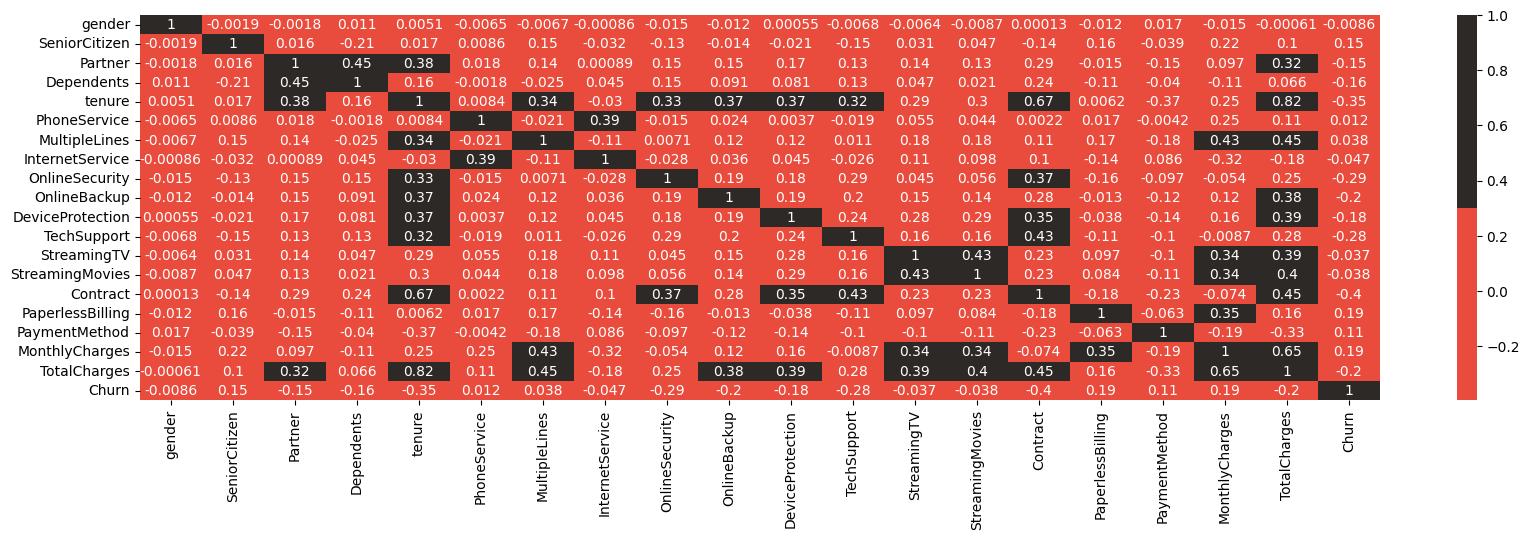

In [12]:
plt.figure(figsize=(20,5))
sns.heatmap(df1.corr(),annot = True, cmap= colors)
plt.show()

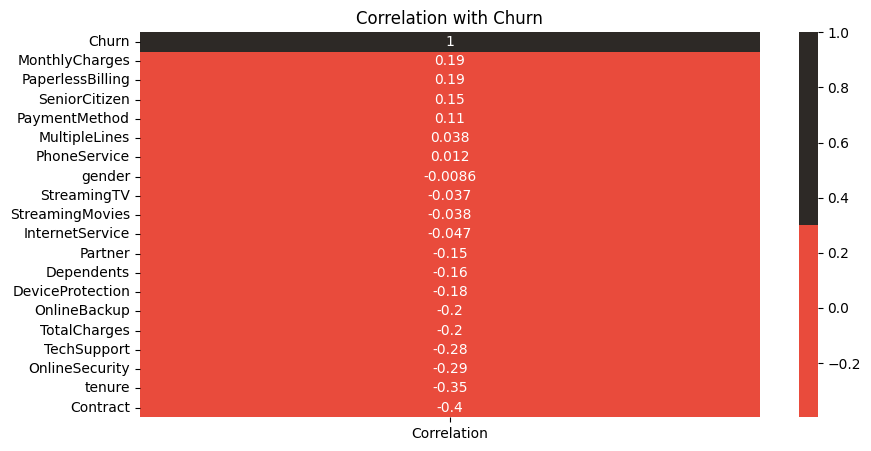

In [13]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot = True, cmap= colors)
plt.title('Correlation with Churn')
plt.show()

- Les caractéristiques MultipleLines, PhoneService, gender, StreamingTV, StreamingMovies et InternetService n'affichent aucune corrélation significative. Nous supprimons donc les caractéristiques dont le coefficient de corrélation se situe entre (-0.1 et 0.1).
- Les autres caractéristiques montrent soit une corrélation positive significative, soit une corrélation négative significative, ce qui les rend pertinentes pour l'analyse et la modélisation.

### Feature Selection for Categorical Features :

In [14]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#### Chi-Squared Test :

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


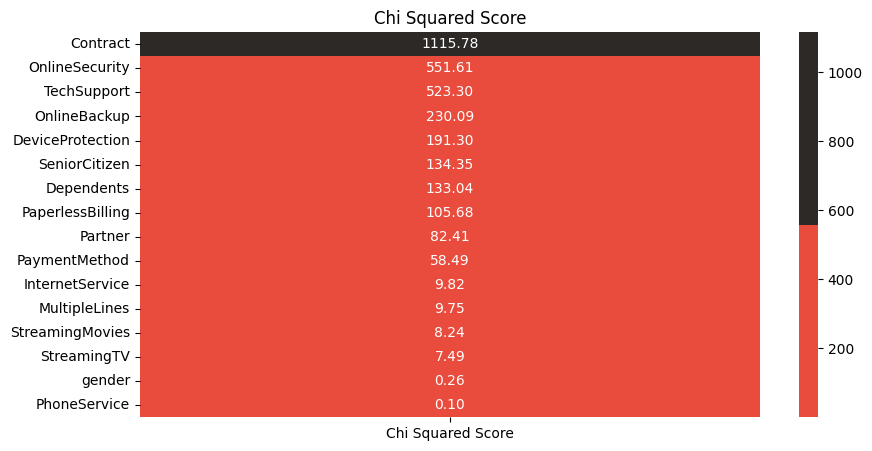

In [15]:
features = df1.loc[:,categorical_features]
print(features.columns)
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func=chi2, k= 'all')
fit = best_features.fit(features, target)
features_scores = pd.DataFrame(data = fit.scores_, index = list(features.columns),columns = ['Chi Squared Score'])
plt.subplots(figsize=(10,5))
sns.heatmap(features_scores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True, cmap= colors,fmt = '.2f')
plt.title('Chi Squared Score')
plt.show()

Les caractéristiques PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines et InternetService présentent une très faible relation avec la variable cible Churn

### Sélection des caractéristiques pour les variables numériques:

In [16]:
from sklearn.feature_selection import f_classif

#### ANOVA Test :

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


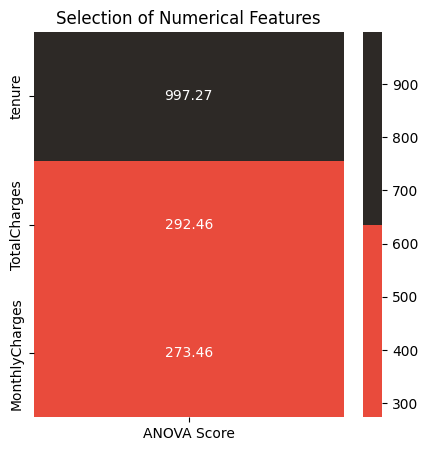

In [17]:
features = df1.loc[:,numerical_features]
print(features.columns)
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func=f_classif, k= 'all')
fit = best_features.fit(features, target)

features_scores = pd.DataFrame(data = fit.scores_, index = list(features.columns),columns = ['ANOVA Score'])
plt.subplots(figsize = (5,5))
sns.heatmap(features_scores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,fmt = '.2f');
plt.title('Selection of Numerical Features');

- Selon le test ANOVA, plus la valeur du score ANOVA est élevée, plus l'importance de la caractéristique est grande.
- D'après les résultats obtenus, nous devons inclure toutes les caractéristiques numériques pour la modélisation.

In [18]:
df1.drop(columns=['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace=True)
df1.head(5)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.013889,0,2,0,0,0,1,2,-1.160323,-0.994680,0
1,0,0,0,0.472222,2,0,2,0,1,0,3,-0.259629,-0.174505,0
2,0,0,0,0.027778,2,2,0,0,0,1,3,-0.362660,-0.960146,1
3,0,0,0,0.625000,2,0,2,2,1,0,0,-0.746535,-0.196006,0
4,0,0,0,0.027778,0,0,0,0,0,1,2,0.197365,-0.940961,1


### Data Balancing utilise SMOTE :

- Pour gérer le déséquilibre des données, il existe deux options :

    - **Undersampling** : Réduire le nombre d’échantillons de la classe majoritaire de la variable cible.
    - **Oversampling** : Augmenter le nombre d’échantillons de la classe minoritaire pour l’aligner sur la classe majoritaire.
    
    
- Après plusieurs essais et erreurs avec l'undersampling et l'oversampling, nous avons décidé d'utiliser l'oversampling pour équilibrer les données !

In [19]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [20]:
over = SMOTE(sampling_strategy=1)

f1 = df1.iloc[:,:13]
t1 = df1.iloc[:,13]
print(Counter(t1))

f1,t1 = over.fit_resample(f1,t1)
print(Counter(t1))

Counter({0: 5174, 1: 1869})
Counter({0: 5174, 1: 5174})


In [21]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics


In [22]:
X_train, X_test, y_train, y_test = train_test_split(f1,t1,test_size=0.2, random_state=42)


In [23]:
pip install --upgrade scikit-learn xgboost


#### Xgboost Classification :

In [24]:
params_xgb = {
    "n_estimators": 100,
    "max_depth": 3,
    "learning_rate": 0.1,
}
xgb = XGBClassifier(**params_xgb)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1021
           1       0.77      0.87      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

0.7980676328502415


Text(0.5, 1.0, 'Confusion Matrix (Train set)')

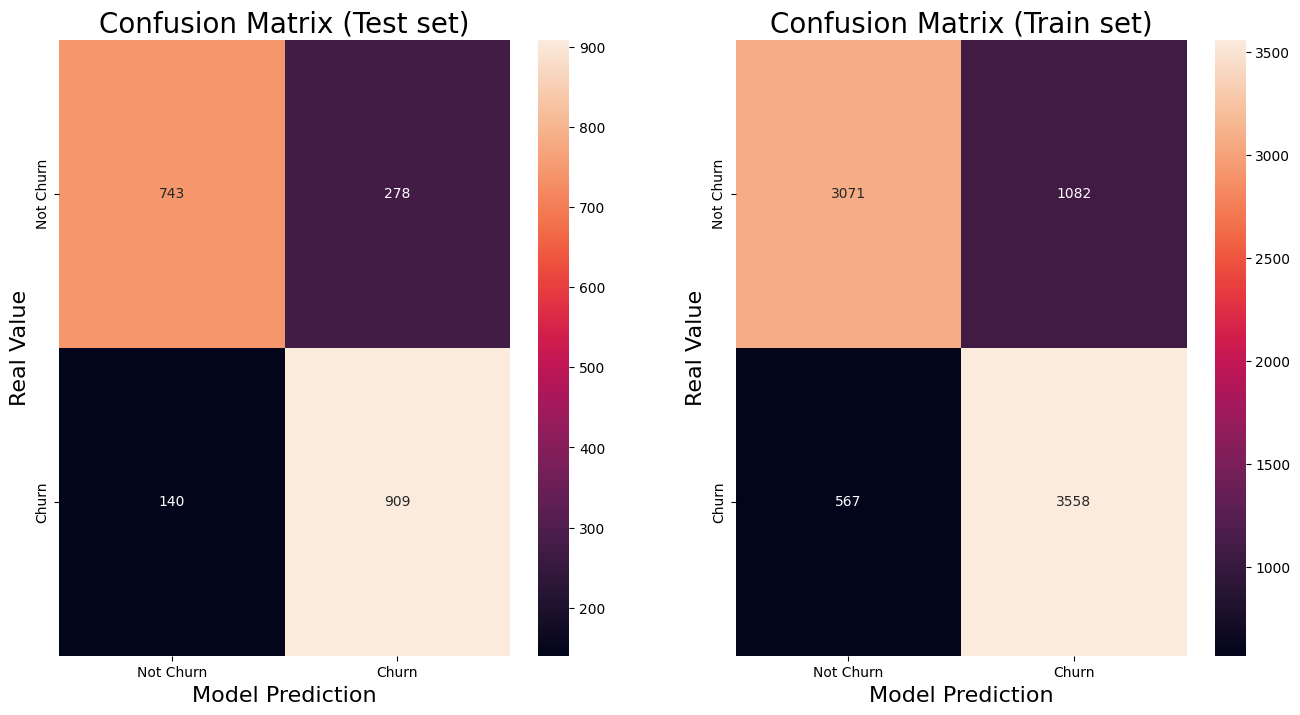

In [25]:
y_pred = xgb.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(acc)
cf = metrics.confusion_matrix(y_test, y_pred)
cf_train = metrics.confusion_matrix(y_train, xgb.predict(X_train))
names_df = ['Not Churn', 'Churn']
cf_df = pd.DataFrame(data=cf, columns=names_df, index=names_df)
cf_train_df = pd.DataFrame(data=cf_train, columns=names_df, index=names_df)
fig, ax = plt.subplots(ncols=2, figsize=(16,8))

sns.heatmap(cf_df, fmt="d",annot=True, ax=ax[0])
ax[0].set_xlabel("Model Prediction", size=16)
ax[0].set_ylabel("Real Value", size=16)
ax[0].set_title("Confusion Matrix (Test set)", size=20)

sns.heatmap(cf_train_df, fmt="d",annot=True, ax=ax[1])
ax[1].set_xlabel("Model Prediction", size=16)
ax[1].set_ylabel("Real Value", size=16)
ax[1].set_title("Confusion Matrix (Train set)", size=20)

Cross Validation Score:  87.18%
ROC_AUC Score:  79.71%


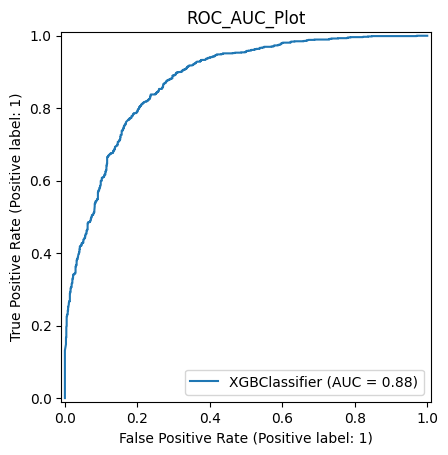

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Créer cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Compter cross-validation avec ROC AUC
cv_score = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='roc_auc').mean()
print("Cross Validation Score: ", '{0:.2%}'.format(cv_score))

# Compter ROC AUC score sur test
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc))

# Visualisation ROC
RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.title('ROC_AUC_Plot')
plt.show()


####  SHAP :

In [27]:
#Run if shap not installed
! pip install shap

In [28]:
import shap

In [29]:
t1 = pd.Series(t1)
f1 = pd.DataFrame(f1)
explainer = shap.TreeExplainer(xgb, f1, model_output = "raw")
shap_values = explainer.shap_values(f1)

 96%|=================== | 9894/10348 [00:32<00:01]       

In [30]:
print(f1.columns)
print(f1.loc[11, :])


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.222222
OnlineSecurity      1.000000
OnlineBackup        1.000000
DeviceProtection    1.000000
TechSupport         1.000000
Contract            2.000000
PaperlessBilling    0.000000
PaymentMethod       1.000000
MonthlyCharges     -1.522595
TotalCharges       -0.863714
Name: 11, dtype: float64


In [31]:
shap.initjs()
customer_index = 5
shap.force_plot(explainer.expected_value, shap_values[customer_index,:], f1.loc[customer_index,:])

In [32]:
customer_index = 5

diagnosis_map = {1: "Churn",
                0: "Not Churn"}
print("-------Customer Real Diagnosis------")

print(t1.replace(diagnosis_map).iloc[customer_index])


print("-------Customer Predicted Diagnosis------")
pred_class = xgb.predict(f1.loc[customer_index:customer_index, :])[0]
if pred_class==0:
    pred_diagnosis = diagnosis_map[0]
    p1 = xgb.predict_proba(f1.loc[customer_index:customer_index, :])[0][0]
    p1_round = round(p1,3)
else:
    pred_diagnosis = diagnosis_map[1]
    p1 = xgb.predict_proba(f1.loc[customer_index:customer_index, :])[0][1]
    p1_round = round(p1,3)
print(f'Probability of being diagnosed with a {pred_diagnosis} \n{p1_round}')

-------Customer Real Diagnosis------
Churn
-------Customer Predicted Diagnosis------
Probability of being diagnosed with a Churn 
0.9179999828338623


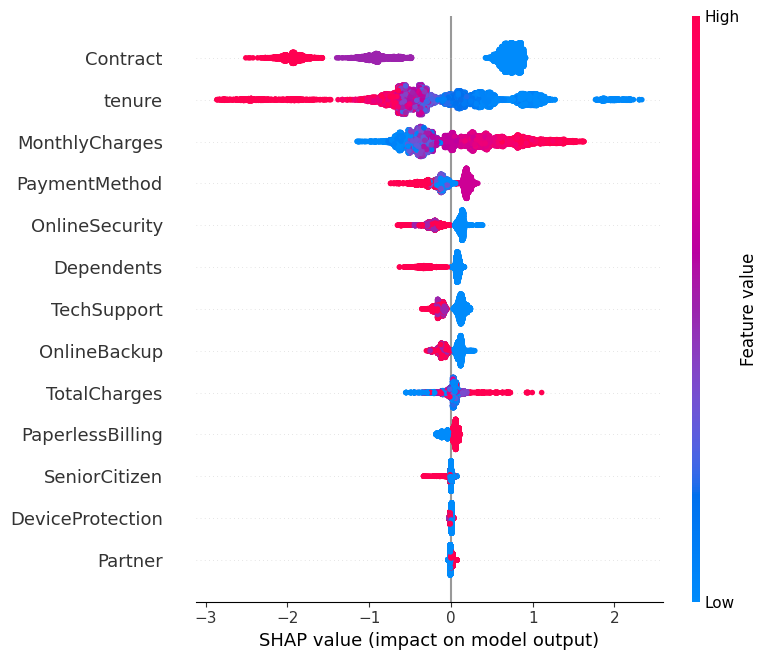

In [33]:
shap.summary_plot(shap_values, f1, show=False)

plt.savefig("shap_summary_plot.png", bbox_inches="tight")